### Translocation sequencing analysis
#### By Duc Nguyen


In [2]:
import os
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# load the tsv file
df = pd.read_csv("RF204_Alt055.tlx", delimiter="\t")
df

,Qname,Rname,Junction,Strand,Rstart,Rend,B_Rname,B_Rstart,B_Rend,B_Strand,B_Qstart,B_Qend,Qstart,Qend,Qlen,Seq,J_Seq
0,M01407:49:000000000-A7CDB:1:2109:6155:16526,chr1,10083,1,10083,10229,chr11,36594883,36595029,-1,3,149,163,311,335.0,TGGAGAGGGTTTCCCCTCAAAGGAATCCTTCTTTTCCTTTTGAGCT...,taaccctaaccctaacccta
1,M01407:49:000000000-A7CDB:1:2108:13218:28605,chr1,10117,1,10117,10209,chr11,36594877,36595029,-1,3,155,158,251,NaN,TGGAGAGGGTTTCCCCTCAAAGGAATACTTCTTTTCCTTTTGAGCT...,ccaaccctaaccctaaccct
2,M01407:49:000000000-A7CDB:1:2103:6761:8534,chr1,10123,1,10123,10214,chr11,36594877,36595029,-1,3,155,158,245,NaN,TGGAGAGGGTTTCCCCTCAAAGGAATCCTTCTTTTCCTTTTGAGCT...,ctaaccctaaccctaaccct
3,M01407:49:000000000-A7CDB:1:2111:23575:24144,chr1,10140,1,10140,10256,chr11,36594896,36595029,-1,3,136,137,251,NaN,TGGAGAGGGTTTCCCCTCAAAGGAATCCTTCTTTTCCTTTTGAGCT...,cctaaccctaaccctaaccc
4,M01407:49:000000000-A7CDB:1:1104:9047:15418,chr1,10154,1,10154,10248,chr11,36594881,36595029,-1,3,151,149,240,337.0,TGGAGAGGGTTTCCCCTCAAAGGAATCCTTCTTTTCCTTTTGAGCT...,taacccctaaccctaaccct
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28547,M01407:49:000000000-A7CDB:1:2113:14748:17996,chrY,58991491,1,58991491,58991600,chr11,36594877,36595029,-1,3,155,189,298,323.0,TGGAGAGGGTTTCCCCTCAAAGGAATCCTTCTTTTCCTTTTGAGCT...,ctgcctgcagtggcattgtg
28548,M01407:49:000000000-A7CDB:1:1114:20957:12350,chrY,58995345,-1,58995280,58995345,chr11,36594892,36595029,-1,3,140,140,205,223.0,TGGAGAGGGTTTCCCCTCAAAGGAATCCTTCTTTTCCTTTTGAGCT...,gtatctctgcaatgatcaat
28549,M01407:49:000000000-A7CDB:1:1101:20541:23758,chrY,59028748,-1,59028699,59028748,chr11,36594893,36595029,-1,3,139,138,187,206.0,TGGAGAGGGTTTCCCCTCAAAGGAATCCTTCTTTTCCTTTTGAGCT...,TATATCTGTGAACAGCAGTG
28550,M01407:49:000000000-A7CDB:1:2105:8746:18201,chrY,59363328,-1,59363218,59363328,chr11,36594889,36595029,-1,3,143,141,251,NaN,TGGAGAGGGGTTCCCCTCAAAGGAATCCTTCTTTTCCTTTTGAGCT...,ggttagggttagggttaggg


In [3]:
# check the integrity of data
# Junction
print(np.sum(df[df['Junction']==df['Rstart']]['Strand']==-1))
print(np.sum(df[df['Junction']==df['Rend']]['Strand']==1))

0
0


In [4]:
# NA values
print(np.sum((df.isna())))

Qname         0
Rname         0
Junction      0
Strand        0
Rstart        0
Rend          0
B_Rname       0
B_Rstart      0
B_Rend        0
B_Strand      0
B_Qstart      0
B_Qend        0
Qstart        0
Qend          0
Qlen        720
Seq           0
J_Seq         0
dtype: int64


In [24]:
def replace_values(row):
  if pd.isna(row['Qlen']):
    return row['Qend'] - row['Qstart']
  else:
    return row['Qlen']

replaced = df[df['Qlen'].isna()]['Qname']
# df['Qlen'] = df.apply(replace_values, axis=1)
df[df['Qname'].isin(replaced)]

,Qname,Rname,Junction,Strand,Rstart,Rend,B_Rname,B_Rstart,B_Rend,B_Strand,B_Qstart,B_Qend,Qstart,Qend,Qlen,Seq,J_Seq
1,M01407:49:000000000-A7CDB:1:2108:13218:28605,chr1,10117,1,10117,10209,chr11,36594877,36595029,-1,3,155,158,251,NaN,TGGAGAGGGTTTCCCCTCAAAGGAATACTTCTTTTCCTTTTGAGCT...,ccaaccctaaccctaaccct
2,M01407:49:000000000-A7CDB:1:2103:6761:8534,chr1,10123,1,10123,10214,chr11,36594877,36595029,-1,3,155,158,245,NaN,TGGAGAGGGTTTCCCCTCAAAGGAATCCTTCTTTTCCTTTTGAGCT...,ctaaccctaaccctaaccct
3,M01407:49:000000000-A7CDB:1:2111:23575:24144,chr1,10140,1,10140,10256,chr11,36594896,36595029,-1,3,136,137,251,NaN,TGGAGAGGGTTTCCCCTCAAAGGAATCCTTCTTTTCCTTTTGAGCT...,cctaaccctaaccctaaccc
10,M01407:49:000000000-A7CDB:1:2114:6309:5091,chr1,1105888,-1,1105854,1105888,chr11,36594987,36595029,-1,3,45,144,179,NaN,TGGAGAGGGTTTCCCCTCAAAGGAATCCGTCATTTCCTTTTGAGCG...,cccctcctccttcctctcct
90,M01407:49:000000000-A7CDB:1:2102:8325:6525,chr1,10980610,-1,10980586,10980610,chr11,36594952,36595029,-1,3,80,206,230,NaN,TGGAGAGGGTTTCCCCTCAAAGGAATCCTTCTTTTCCTTTTGAGCT...,TTTTTTTTTTACTTTTAGAT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28537,M01407:49:000000000-A7CDB:1:2108:19723:18990,chrY,13459670,1,13459670,13459695,chr11,36594930,36595029,-1,3,102,167,192,NaN,TGGAGAGGGTTTCCCCTCAAAGGAATCCTTCTTTTCCTTTTGAGCT...,cgttccattccattccattc
28539,M01407:49:000000000-A7CDB:1:2109:29089:18505,chrY,13464594,-1,13464558,13464594,chr11,36594898,36595029,-1,3,134,213,249,NaN,TGGAGAGGGTTTCCCCTCAAAGGAATCCTTCTTTTCCTTTTGAGCT...,tatcctggatgagcagttca
28543,M01407:49:000000000-A7CDB:1:2113:16254:15121,chrY,13863308,1,13863308,13863362,chr11,36594878,36595029,-1,3,154,153,207,NaN,TGGAGAGGGTTTCCCCTCAAAGGAATCCTTCTTTTCCTTTTGAGCT...,ggaatggaatagagtcaaat
28550,M01407:49:000000000-A7CDB:1:2105:8746:18201,chrY,59363328,-1,59363218,59363328,chr11,36594889,36595029,-1,3,143,141,251,NaN,TGGAGAGGGGTTCCCCTCAAAGGAATCCTTCTTTTCCTTTTGAGCT...,ggttagggttagggttaggg


Orientation	Count
 -1    14716
 1    13836 

Query length
 count    27832.000000
mean       326.084579
std        108.417010
min         76.000000
25%        248.000000
50%        311.000000
75%        381.000000
max       1821.000000
Percent aligned query length: 44.18 %


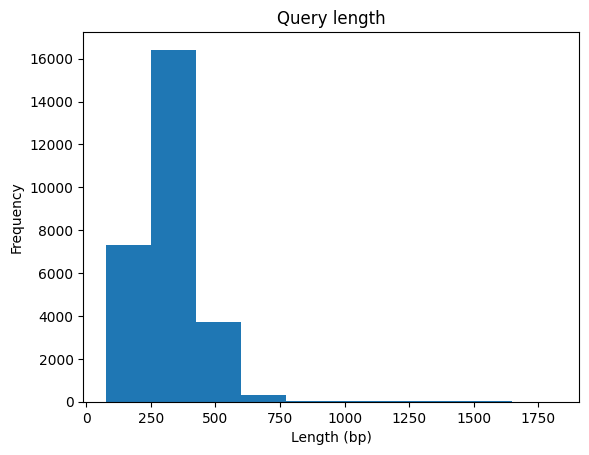

In [5]:
# summary statistics
print("Orientation\tCount\n",df['Strand'].value_counts().to_string(),"\n")

print("Query length\n",df['Qlen'].describe().to_string())
print('Percent aligned query length:', round(np.sum(df['Qend']-df['Qstart'])/np.sum(df['Qlen'])*100, 2),'%')
fig, ax = plt.subplots(1, 1) 
ax.hist(df['Qlen'])  
ax.set_title("Query length") 
ax.set_xlabel('Length (bp)') 
ax.set_ylabel('Frequency') 
plt.show()

In [6]:
# statistics by chromosomes
def calculate_difference(group):
  return round(np.sum(group['Qend'] - group['Qstart'])/np.sum(group['Qlen'])*100, 2)

# df.groupby('Rname').apply(calculate_difference)

In [7]:
chromosomes = pd.read_csv('ChromInfo.txt', delimiter='\t', header=None)
chromosomes = chromosomes.set_index(0).T.to_dict('index')[1]
chromosomes

{'chr1': 249250621,
 'chr10': 135534747,
 'chr11': 135006516,
 'chr12': 133851895,
 'chr13': 115169878,
 'chr14': 107349540,
 'chr15': 102531392,
 'chr16': 90354753,
 'chr17': 81195210,
 'chr18': 78077248,
 'chr19': 59128983,
 'chr2': 243199373,
 'chr20': 63025520,
 'chr21': 48129895,
 'chr22': 51304566,
 'chr3': 198022430,
 'chr4': 191154276,
 'chr5': 180915260,
 'chr6': 171115067,
 'chr7': 159138663,
 'chr8': 146364022,
 'chr9': 141213431,
 'chrM': 16571,
 'chrX': 155270560,
 'chrY': 59373566}

In [10]:
bin_size=1000000
newdf = df.copy(deep=True)
newdf['bin'] = newdf['Junction'] // bin_size
bin_counts = pd.DataFrame(columns = ['Chrom', 'Bin', 'Count'])

for chrom_name, chrom_length in chromosomes.items():
    chrom_df = newdf[newdf['Rname'] == chrom_name]
    bins = chrom_df.groupby('bin').groups.keys()
    counts = chrom_df.groupby('bin')['Qname'].count()
    bin_counts = pd.concat([bin_counts, pd.DataFrame({'Chrom': chrom_name, 'Bin': bins, 'Count': counts})])
bin_counts

,Chrom,Bin,Count
0,chr1,0,8
1,chr1,1,19
2,chr1,2,8
3,chr1,3,7
4,chr1,4,9
...,...,...,...
13,chrY,13,9
17,chrY,17,1
28,chrY,28,1
58,chrY,58,3


In [53]:
bin_counts['Start'] = bin_counts['Bin']*bin_size
bin_counts['End']=(bin_counts['Bin']+1)*bin_size-1
bin_counts = bin_counts.drop('Bin', axis=1)
bin_counts = bin_counts.reindex(columns=['Chrom', 'Start', 'End', 'Count'])
# write bin counts to bedGraph file
bin_counts.to_csv('output_bin_count.bg', sep="\t", index=False, header=False)

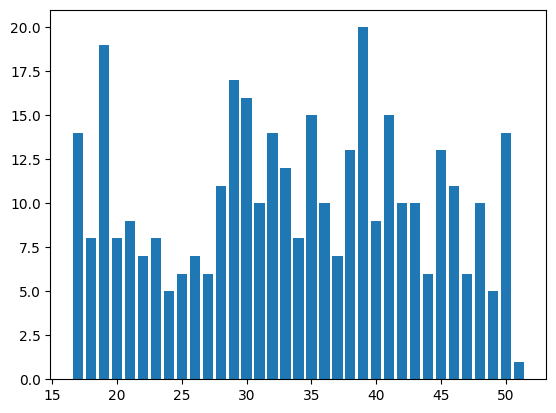

In [127]:
# plt.bar(chr22.groupby('bin').groups.keys(), chr22.groupby('bin')['Qname'].count(),
#         main='')
# plt.show()

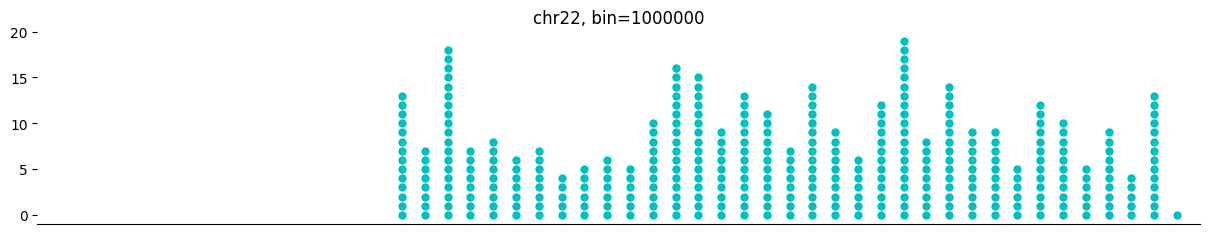

In [177]:
# data = pd.DataFrame({'bin': chr22.groupby('bin').groups.keys(),'count': chr22.groupby('bin')['Qname'].count()})

# fig, ax = plt.subplots(figsize=(15, 2.5))
# for value, count in zip(data['bin'], data['count']):
#     ax.plot([value]*count, list(range(count)), 'co', ms=5, linestyle='')
# for spine in ['top', 'left', 'right']:
#     ax.spines[spine].set_visible(False)
# ax.set_title(f'chr22, bin={bin}')
# ax.set_ylim(-1, data['count'].max())
# ax.set_xlim(1, data['bin'].max()+1)
# ax.set_xticks([])
# # ax.set_xticks(range(1, data['bin'].max()+1))
# ax.tick_params(axis='x', length=0, pad=8, labelsize=12)

# plt.show()

In [5]:
color_map = {
        2000: 'purple',
        500: 'blue',
        100:'green',
        20:'orange',
        5: 'red',
        1: 'black'
    }

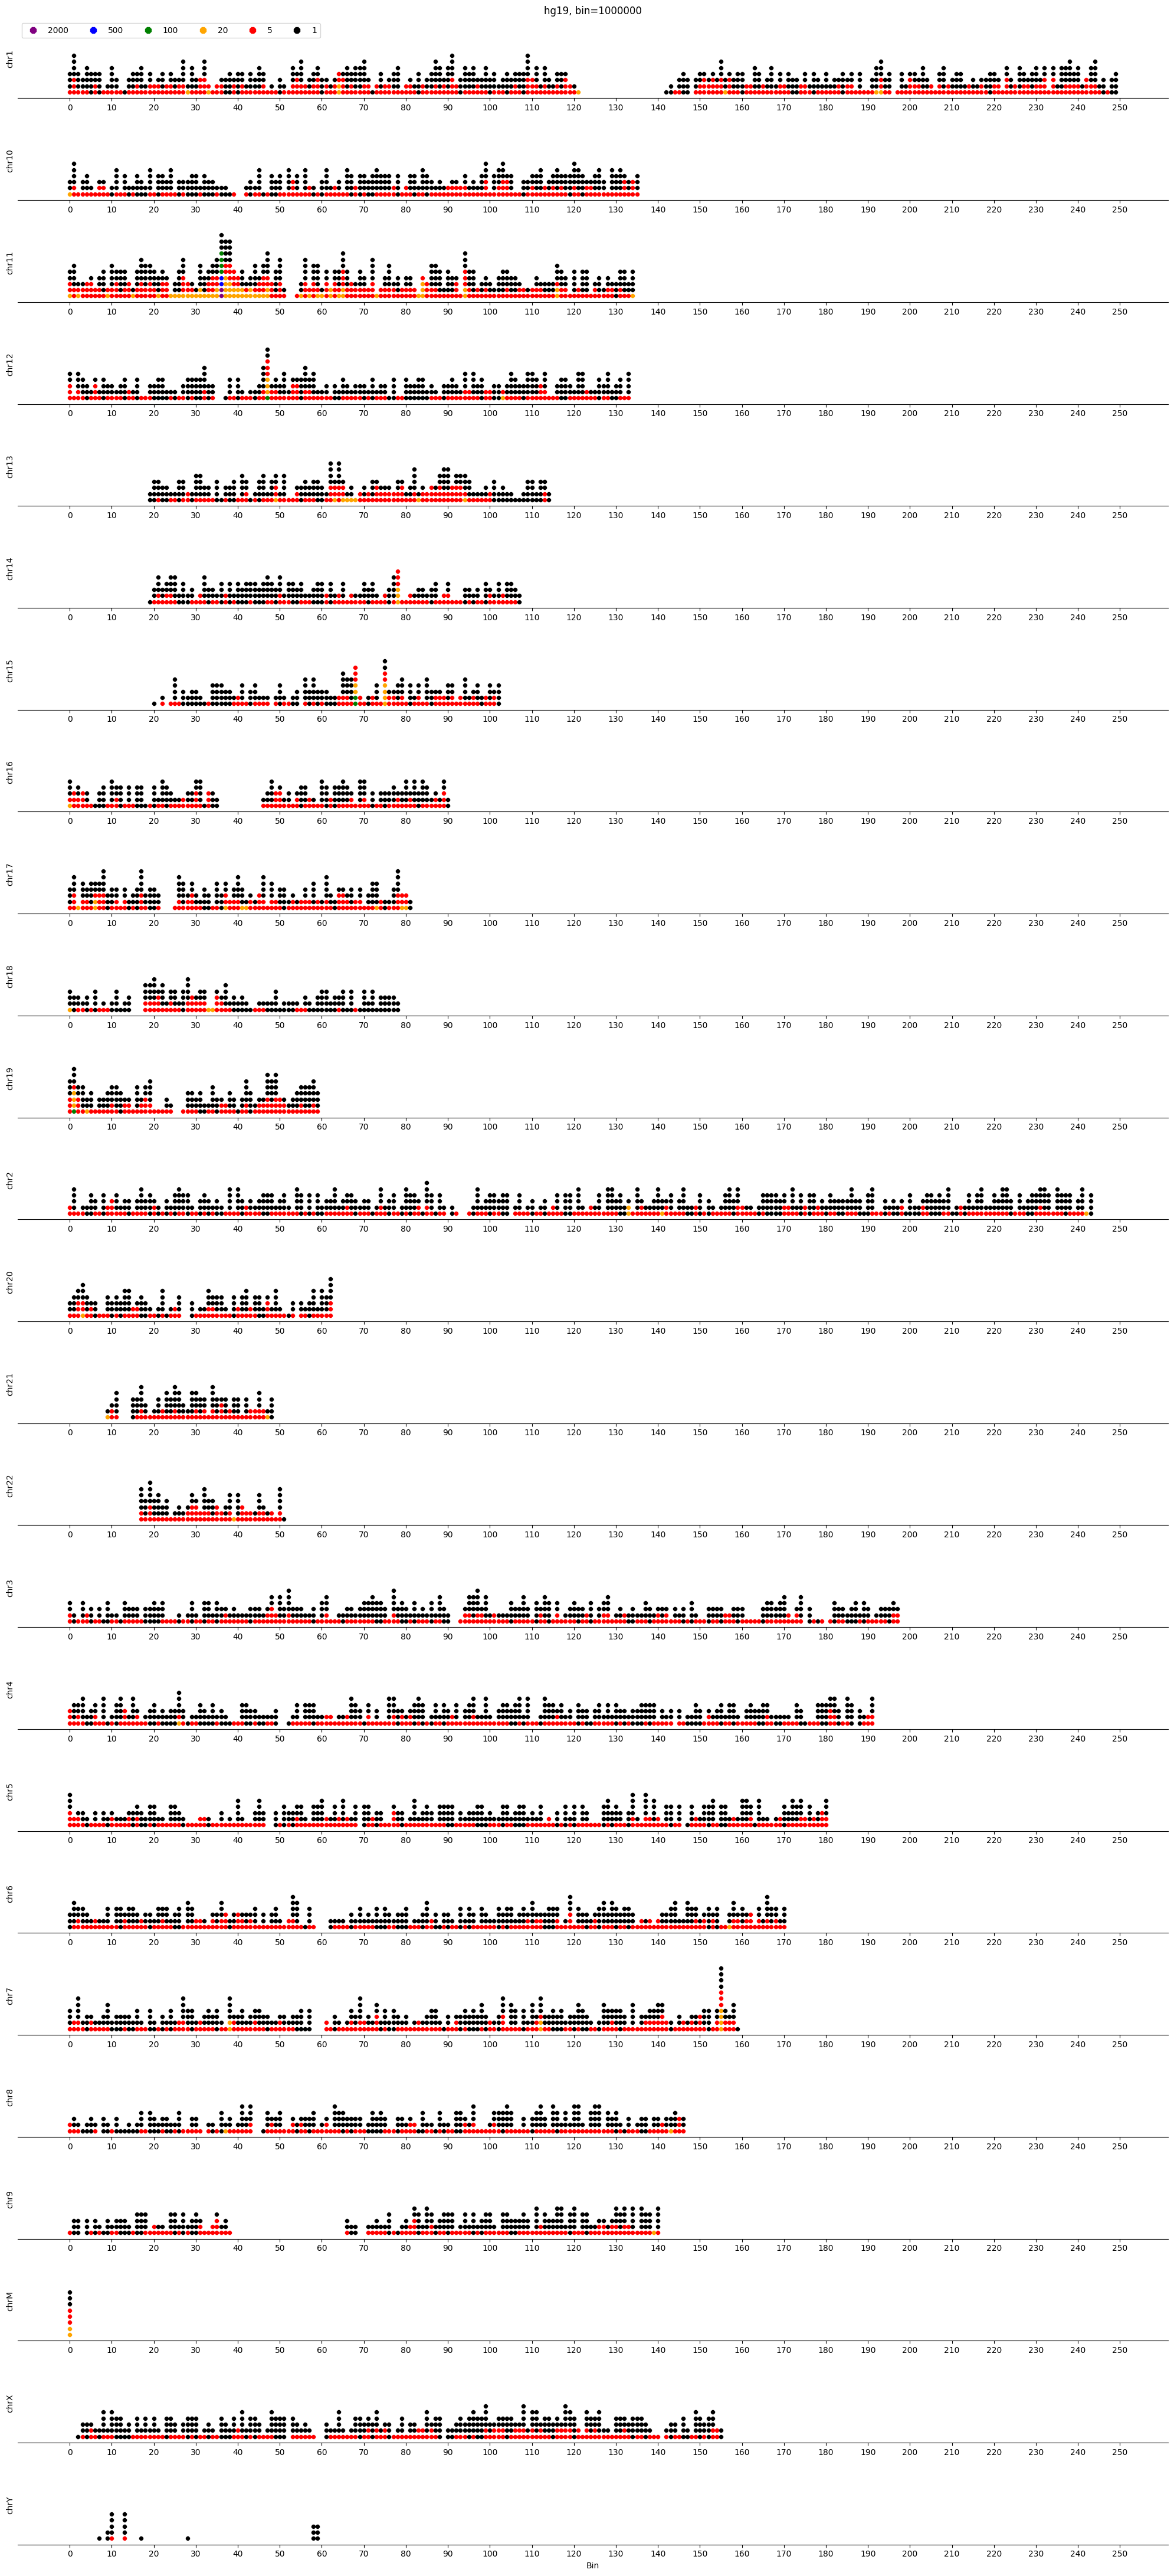

In [42]:
import matplotlib.lines as lines

def dot_plot_splitv2(data, color_map, chromosomes, title="Hit map", bin_size=1000000):
    
    # divide the raw count into small chunks
    def display_count(frequency, max_values):
        display_count=[]
        for max_val in max_values:
            display_count.append(frequency//max_val)
            frequency = frequency%max_val
        return display_count

    # dotplot
    fig, axes = plt.subplots(len(chromosomes), 1, sharex=True, figsize=(20, 1.75*len(chromosomes)))
    for index, (chrom_name, chrom_length) in enumerate(chromosomes.items()):
        
        sub_data = data[data['Chrom'] == chrom_name][['Bin', 'Count']]
        sub_data = np.array(sub_data)
        for value, freq in zip(sub_data[:,0], sub_data[:,1]):    
            display_counts = display_count(freq, color_map)
            for i, count in enumerate(display_counts):
                axes[index].plot([value]*count, list(range(sum(display_counts[:i]), sum(display_counts[:(i+1)]))), 
                        '8', ms=4.5, linestyle='', c=list(color_map.values())[i])
        
        # show y-axis labels and ticks
        for spine in ['top', 'left', 'right']:
            axes[index].spines[spine].set_visible(False)
        axes[index].set_ylim(-1, 12)
        axes[index].set_yticks([])
        axes[index].set_ylabel(chrom_name)
        axes[index].xaxis.set_tick_params(which='both', labelbottom=True)
    
    # # show x-axis and title
    axes[0].set_title(title)
    axes[-1].set_xticks(np.arange(0, math.ceil(max(chromosomes.values())//bin_size)+2, 10))
    axes[-1].set_xlabel('Bin')
    
    # legend
    symbols = []
    for max_val, color in color_map.items():
        symbols.append(lines.Line2D([], [], color=color, marker='8', linestyle='None',
                        ms=8, label=max_val))
    axes[0].legend(handles=symbols, loc='upper left', ncol = 6)
    
    plt.tight_layout()
    plt.savefig('bin_count_plot.pdf')

input_data = pd.read_csv('bin_count.tsv', delimiter="\t", header=None)
input_data = input_data.rename(columns={0: "Chrom", 1: "Bin", 2: "Count"})
dot_plot_splitv2(input_data, color_map, chromosomes, f'hg19, bin={bin_size}', bin_size=1000000)